<a href="https://colab.research.google.com/github/Garima-is-awesome/Langgraph-Chatbot-with-tools/blob/main/ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
## ChatBots with LangGraph
```



In [1]:
!pip install langgraph langchain


In [2]:
!pip install langsmith langchain_groq langchain_community


In [3]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')



In [4]:
langsmith_api_key=userdata.get('langsmith_api_key')


In [5]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [6]:
from langchain_groq import ChatGroq

In [7]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.1-8b-instant")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x78259006ec30>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78258fce44a0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

# Start Using LangGraph

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [9]:
class State(TypedDict):

  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [10]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [11]:
graph_builder.add_node("chatbot",chatbot)

In [12]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [13]:
graph=graph_builder.compile()

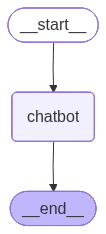

In [14]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [15]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: what is generative ai
dict_values([{'messages': AIMessage(content='Generative AI refers to a subset of artificial intelligence (AI) that focuses on generating new, original content, such as images, videos, music, text, and even entire worlds. This type of AI uses algorithms to create new data that is similar in style and structure to existing data, but with its own unique characteristics.\n\nGenerative AI is based on machine learning and deep learning techniques, particularly those involving neural networks. These models are trained on large datasets, where they learn to identify patterns, relationships, and structures. Once trained, the models can generate new data by applying these learned patterns and relationships to novel inputs.\n\nSome common applications of generative AI include:\n\n1. **Image and video generation**: Generative adversarial networks (GANs) can create realistic images, videos, and even 3D models.\n2. **Text generation**: Language models, such as those used 